In [11]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=1337
)

X = StandardScaler().fit_transform(X)

df = pd.DataFrame({"f1": X[:, 0], "f2": X[:, 1]})
df.head()

,f1,f2
0,0.342045,-0.704298
1,0.463568,0.581143
2,-1.464397,-0.328075
3,-1.188798,-1.067647
4,0.342976,-0.330380


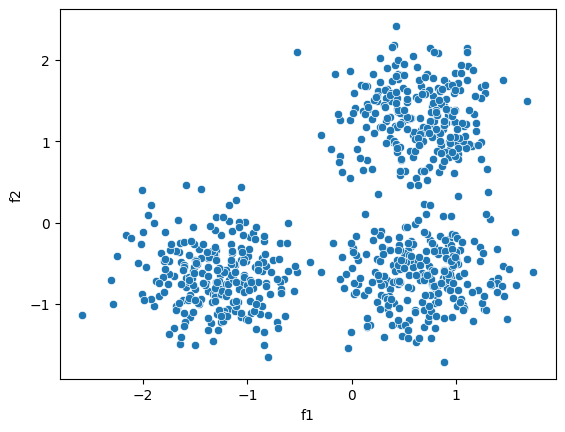

In [13]:
sns.scatterplot(df, x='f1', y='f2')
plt.show()

In [14]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.3, min_samples=10)
dbs.fit(df[["f1", "f2"]])
dbs.labels_

array([ 0,  1,  2,  2,  0,  0,  1,  0,  1,  2,  1,  2,  1,  1,  2,  1,  2,
        0,  2,  0,  2,  1,  1,  0,  0,  2,  1,  1,  1,  0,  1,  2,  2,  2,
        2,  1,  0,  2,  2,  1,  0,  2,  0,  1,  1,  0,  1,  1,  2,  2,  2,
        1,  0,  2,  0,  2,  1,  2,  2,  1,  1,  0,  2,  2,  2,  2,  0,  1,
        1,  1,  0,  2,  0,  0,  0,  0, -1,  0,  2,  1,  0,  2,  1,  0,  1,
        1,  2,  0,  2,  1,  2,  1,  1,  1,  2,  2,  0,  0,  1,  0,  2,  1,
        0,  0,  0,  2,  1,  2,  2,  1,  2,  1,  1, -1,  2,  2,  0,  0,  1,
        2,  1,  0,  0,  1,  0,  0,  1,  2,  0,  2, -1,  1,  2,  2,  1,  1,
        1,  2,  0,  1,  0,  0,  0,  1,  0,  2,  2,  0,  0,  2,  2,  1,  0,
        1,  2,  2,  1,  1,  0,  1,  1,  2, -1,  2,  2,  2,  2,  2,  2,  1,
        2,  2,  2,  1,  2,  1,  1,  2,  1,  2,  0,  1, -1,  0,  0,  2,  2,
        1,  0,  2,  1,  2,  1,  2,  0,  2,  0,  1,  1,  1,  0,  1,  1,  2,
        1, -1,  1,  0,  2,  2,  0,  1,  1,  0,  2,  1,  0,  2,  0,  0,  2,
        2,  2,  2,  1,  1

In [15]:
df["cluster"] = dbs.labels_
df.head()

,f1,f2,cluster
0,0.342045,-0.704298,0
1,0.463568,0.581143,1
2,-1.464397,-0.328075,2
3,-1.188798,-1.067647,2
4,0.342976,-0.330380,0


In [16]:
df["cluster"].value_counts()

cluster
 1    244
 0    243
 2    243
-1     20
Name: count, dtype: int64

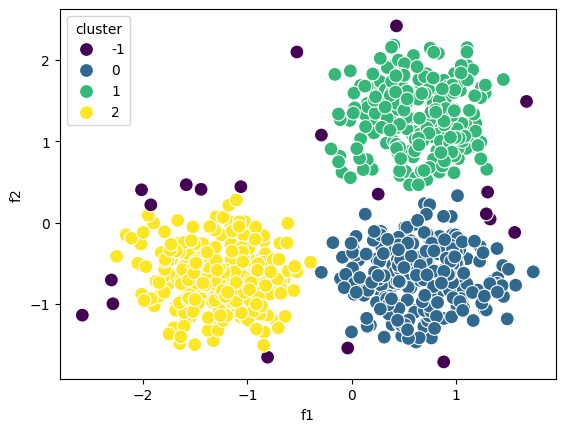

In [18]:
sns.scatterplot(df, x="f1", y="f2", hue="cluster", palette='viridis', s=100)
plt.show()